#Creating KNN Model for Cancer detection
#Name-Sarthak Motwani
#Roll No-200887

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import svm

Encoding the categorical data

In [ ]:
categories = ['non-cancer','cancer']

In [ ]:
train_data = pd.read_csv("/content/risk_factors_cervical_cancer.csv")
train_data



Finding out missing values

In [ ]:
train_data.replace('?', np.nan, inplace=True)
train_data.isna().sum()/len(train_data)

Age                                   0.000000
Number of sexual partners             0.030303
First sexual intercourse              0.008159
Num of pregnancies                    0.065268
Smokes                                0.015152
Smokes (years)                        0.015152
Smokes (packs/year)                   0.015152
Hormonal Contraceptives               0.125874
Hormonal Contraceptives (years)       0.125874
IUD                                   0.136364
IUD (years)                           0.136364
STDs                                  0.122378
STDs (number)                         0.122378
STDs:condylomatosis                   0.122378
STDs:cervical condylomatosis          0.122378
STDs:vaginal condylomatosis           0.122378
STDs:vulvo-perineal condylomatosis    0.122378
STDs:syphilis                         0.122378
STDs:pelvic inflammatory disease      0.122378
STDs:genital herpes                   0.122378
STDs:molluscum contagiosum            0.122378
STDs:AIDS    

Data imputation for missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
data_dropped = train_data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_dropped), columns=data_dropped.columns)
data_imputed

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating boxplot for imputed data

<Axes: >

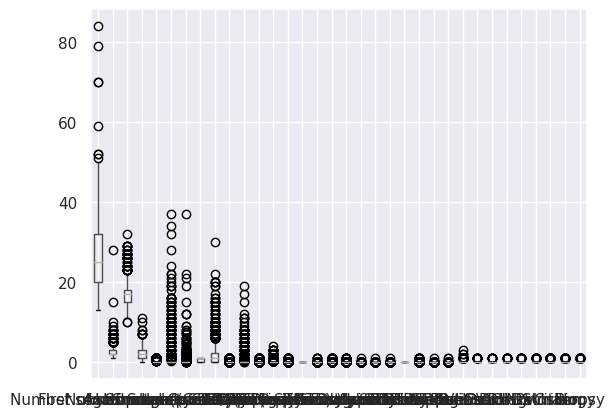

In [ ]:
data_imputed.boxplot()

Normalizing our dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identifying columns that need to be normalized
columns_to_normalize = ['Age','First sexual intercourse', 'Hormonal Contraceptives (years)', 'Smokes (packs/year)','Smokes (years)','Smokes','Num of pregnancies' ]

scaler = MinMaxScaler()

data_imputed[columns_to_normalize] = scaler.fit_transform(data_imputed[columns_to_normalize])

# Saving normalized DataFrame as a new CSV file
data_imputed.to_csv('normalized_data.csv', index=False)

In [ ]:
train_data=pd.read_csv('normalized_data.csv')
train_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.070423,4.0,0.227273,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,1.0,0.181818,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,1.0,0.317968,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,5.0,0.272727,0.363636,1.0,1.0,1.0,1.0,0.100000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.464789,3.0,0.500000,0.363636,0.0,0.0,0.0,1.0,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.295775,3.0,0.363636,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.267606,2.0,0.409091,0.090909,0.0,0.0,0.0,1.0,0.266667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.169014,2.0,0.318182,0.000000,0.0,0.0,0.0,1.0,0.002667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,0.281690,2.0,0.636364,0.181818,0.0,0.0,0.0,1.0,0.002667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating boxplot of our normalized data

<Axes: >

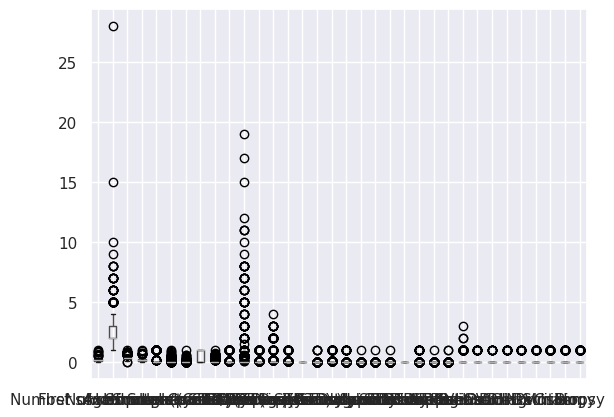

In [ ]:
train_data.boxplot()

Identifying usefull Features through Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = train_data.iloc[:,0:29]  #independent columns
y3 = train_data.iloc[:,-3]    #target column i.e Schiller
y2 = train_data.iloc[:,-2]    #target column i.e Citology
y1 = train_data.iloc[:,-1]    #target column i.e Biopsy
y4 = train_data.iloc[:,-4]    #target column i.e Hinselmann

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit3 = bestfeatures.fit(X,y3) #For Schiller
fit2 = bestfeatures.fit(X,y2) #For Citology
fit1 = bestfeatures.fit(X,y1) #For Biopsy
fit4 = bestfeatures.fit(X,y4) #For Hinselmann

dfscores3 = pd.DataFrame(fit3.scores_) #For Schiller
dfscores2 = pd.DataFrame(fit2.scores_) #For Citology
dfscores1 = pd.DataFrame(fit1.scores_) #For Biopsy
dfscores4 = pd.DataFrame(fit4.scores_) #For Hinselmann

dfcolumns = pd.DataFrame(X.columns)

featureScores3 = pd.concat([dfcolumns,dfscores3],axis=1) #For Schiller
featureScores2 = pd.concat([dfcolumns,dfscores2],axis=1) #For Citology
featureScores1 = pd.concat([dfcolumns,dfscores1],axis=1) #For Biopsy
featureScores4 = pd.concat([dfcolumns,dfscores4],axis=1) #For Hinselmann

featureScores3.columns = ['Specs','Score']  #naming the dataframe columns for Schiller
print(featureScores3.nlargest(10,'Score'))  #print 10 best features
featureScores2.columns = ['Specs','Score']  #naming the dataframe columns for Citology
print(featureScores2.nlargest(10,'Score'))  #print 10 best features
featureScores1.columns = ['Specs','Score']  #naming the dataframe columns for Biopsy
print(featureScores1.nlargest(10,'Score'))  #print 10 best features
featureScores4.columns = ['Specs','Score']  #naming the dataframe columns for Hinselmann
print(featureScores4.nlargest(10,'Score'))  #print 10 best features

                                 Specs      Score
26                           Dx:Cancer  15.142441
28                              Dx:HPV  15.142441
22                            STDs:HIV   5.831686
12                       STDs (number)   5.708464
25           STDs: Number of diagnosis   5.291286
16  STDs:vulvo-perineal condylomatosis   2.089212
13                 STDs:condylomatosis   1.947993
5                       Smokes (years)   1.586615
11                                STDs   1.538726
1            Number of sexual partners   1.410362
                                 Specs      Score
26                           Dx:Cancer  15.142441
28                              Dx:HPV  15.142441
22                            STDs:HIV   5.831686
12                       STDs (number)   5.708464
25           STDs: Number of diagnosis   5.291286
16  STDs:vulvo-perineal condylomatosis   2.089212
13                 STDs:condylomatosis   1.947993
5                       Smokes (years)   1.586615


Identifying usefull Features through ExtratreesClassifier

Top 10 features for Biopsy using ExtraTreesClassifier
[0.17354417 0.10863648 0.13229931 0.13149925 0.01925525 0.03470467
 0.03376309 0.03129869 0.14468254 0.02414947 0.03881533 0.00778612
 0.00785821 0.0043345  0.         0.00159655 0.00521376 0.00366654
 0.00049177 0.01439195 0.00060467 0.         0.01169689 0.00140236
 0.00219743 0.0097711  0.01636429 0.02264179 0.0173338 ]


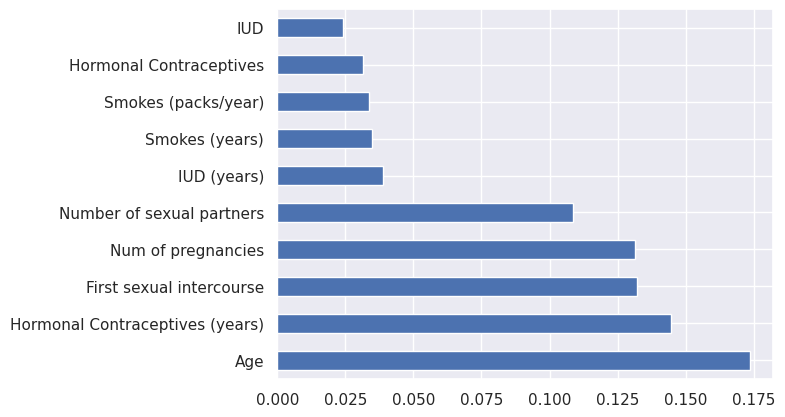

Top 10 features for Citology using ExtraTreesClassifier
[0.23224024 0.14318194 0.18166545 0.11329663 0.01505354 0.0281491
 0.03295566 0.0219214  0.12581404 0.01953858 0.02689905 0.00288578
 0.00723173 0.00343508 0.         0.00092869 0.00336653 0.00162683
 0.00036371 0.00064896 0.00107688 0.         0.0083832  0.00056426
 0.0018213  0.0072926  0.00983563 0.00035385 0.00946934]


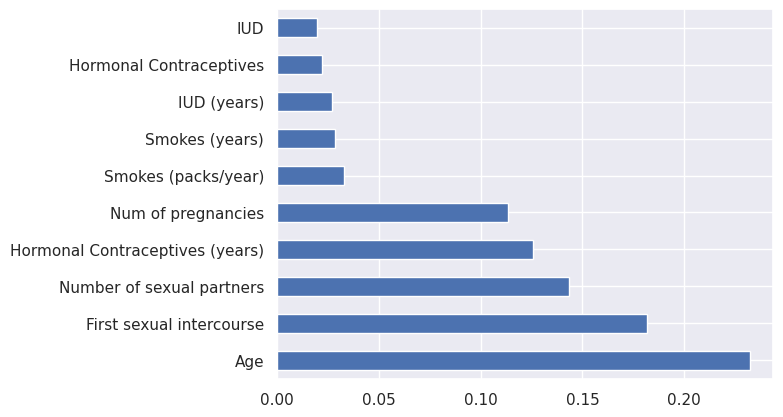

Top 10 features for Schiller using ExtraTreesClassifier
[0.19639567 0.10901842 0.14429225 0.12374395 0.02131439 0.03586496
 0.03225962 0.0272896  0.13876828 0.02150389 0.0421315  0.00628828
 0.0112736  0.00582834 0.         0.0028071  0.00826949 0.00568943
 0.00048644 0.00070428 0.00044809 0.         0.01196414 0.00127995
 0.00204202 0.01128758 0.0149705  0.00776626 0.01631196]


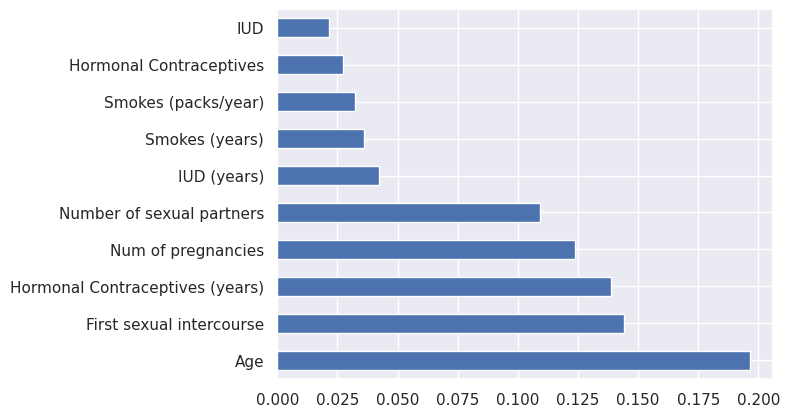

Top 10 features for Hinselmann using ExtraTreesClassifier
[0.17887358 0.10687999 0.14446172 0.12836418 0.01921616 0.04680785
 0.03720839 0.02403489 0.15701089 0.02746955 0.04063799 0.00297297
 0.01186447 0.00280978 0.         0.00176994 0.00310001 0.00825116
 0.00025825 0.00033993 0.00025697 0.         0.00719488 0.0011378
 0.00213717 0.02025261 0.01070671 0.00214288 0.01383927]


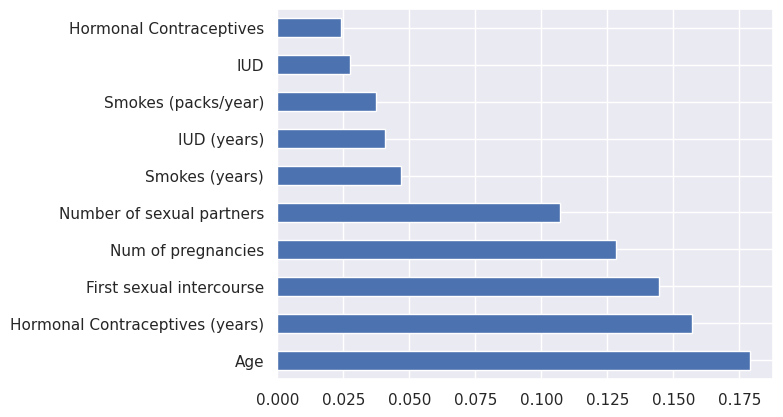

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model2 = ExtraTreesClassifier()
model3 = ExtraTreesClassifier()
model4 = ExtraTreesClassifier()

model4.fit(X,y4)
model3.fit(X,y3)
model2.fit(X,y2)
model1.fit(X,y1)

#For Biopsy
print("Top 10 features for Biopsy using ExtraTreesClassifier")
print(model1.feature_importances_)
#graph plot of feature importances
feat_importances1 = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances1.nlargest(10).plot(kind='barh')
plt.show()

#For Citology
print("Top 10 features for Citology using ExtraTreesClassifier")
print(model2.feature_importances_)
#graph plot of feature importances
feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(10).plot(kind='barh')
plt.show()

#For Schiller
print("Top 10 features for Schiller using ExtraTreesClassifier")
print(model3.feature_importances_)
#graph plot of feature importances
feat_importances3 = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances3.nlargest(10).plot(kind='barh')
plt.show()

#For Hinselmann
print("Top 10 features for Hinselmann using ExtraTreesClassifier")
print(model4.feature_importances_)
#graph plot of feature importances
feat_importances4 = pd.Series(model4.feature_importances_, index=X.columns)
feat_importances4.nlargest(10).plot(kind='barh')
plt.show()

Creating Correlation Matrix using heatmap

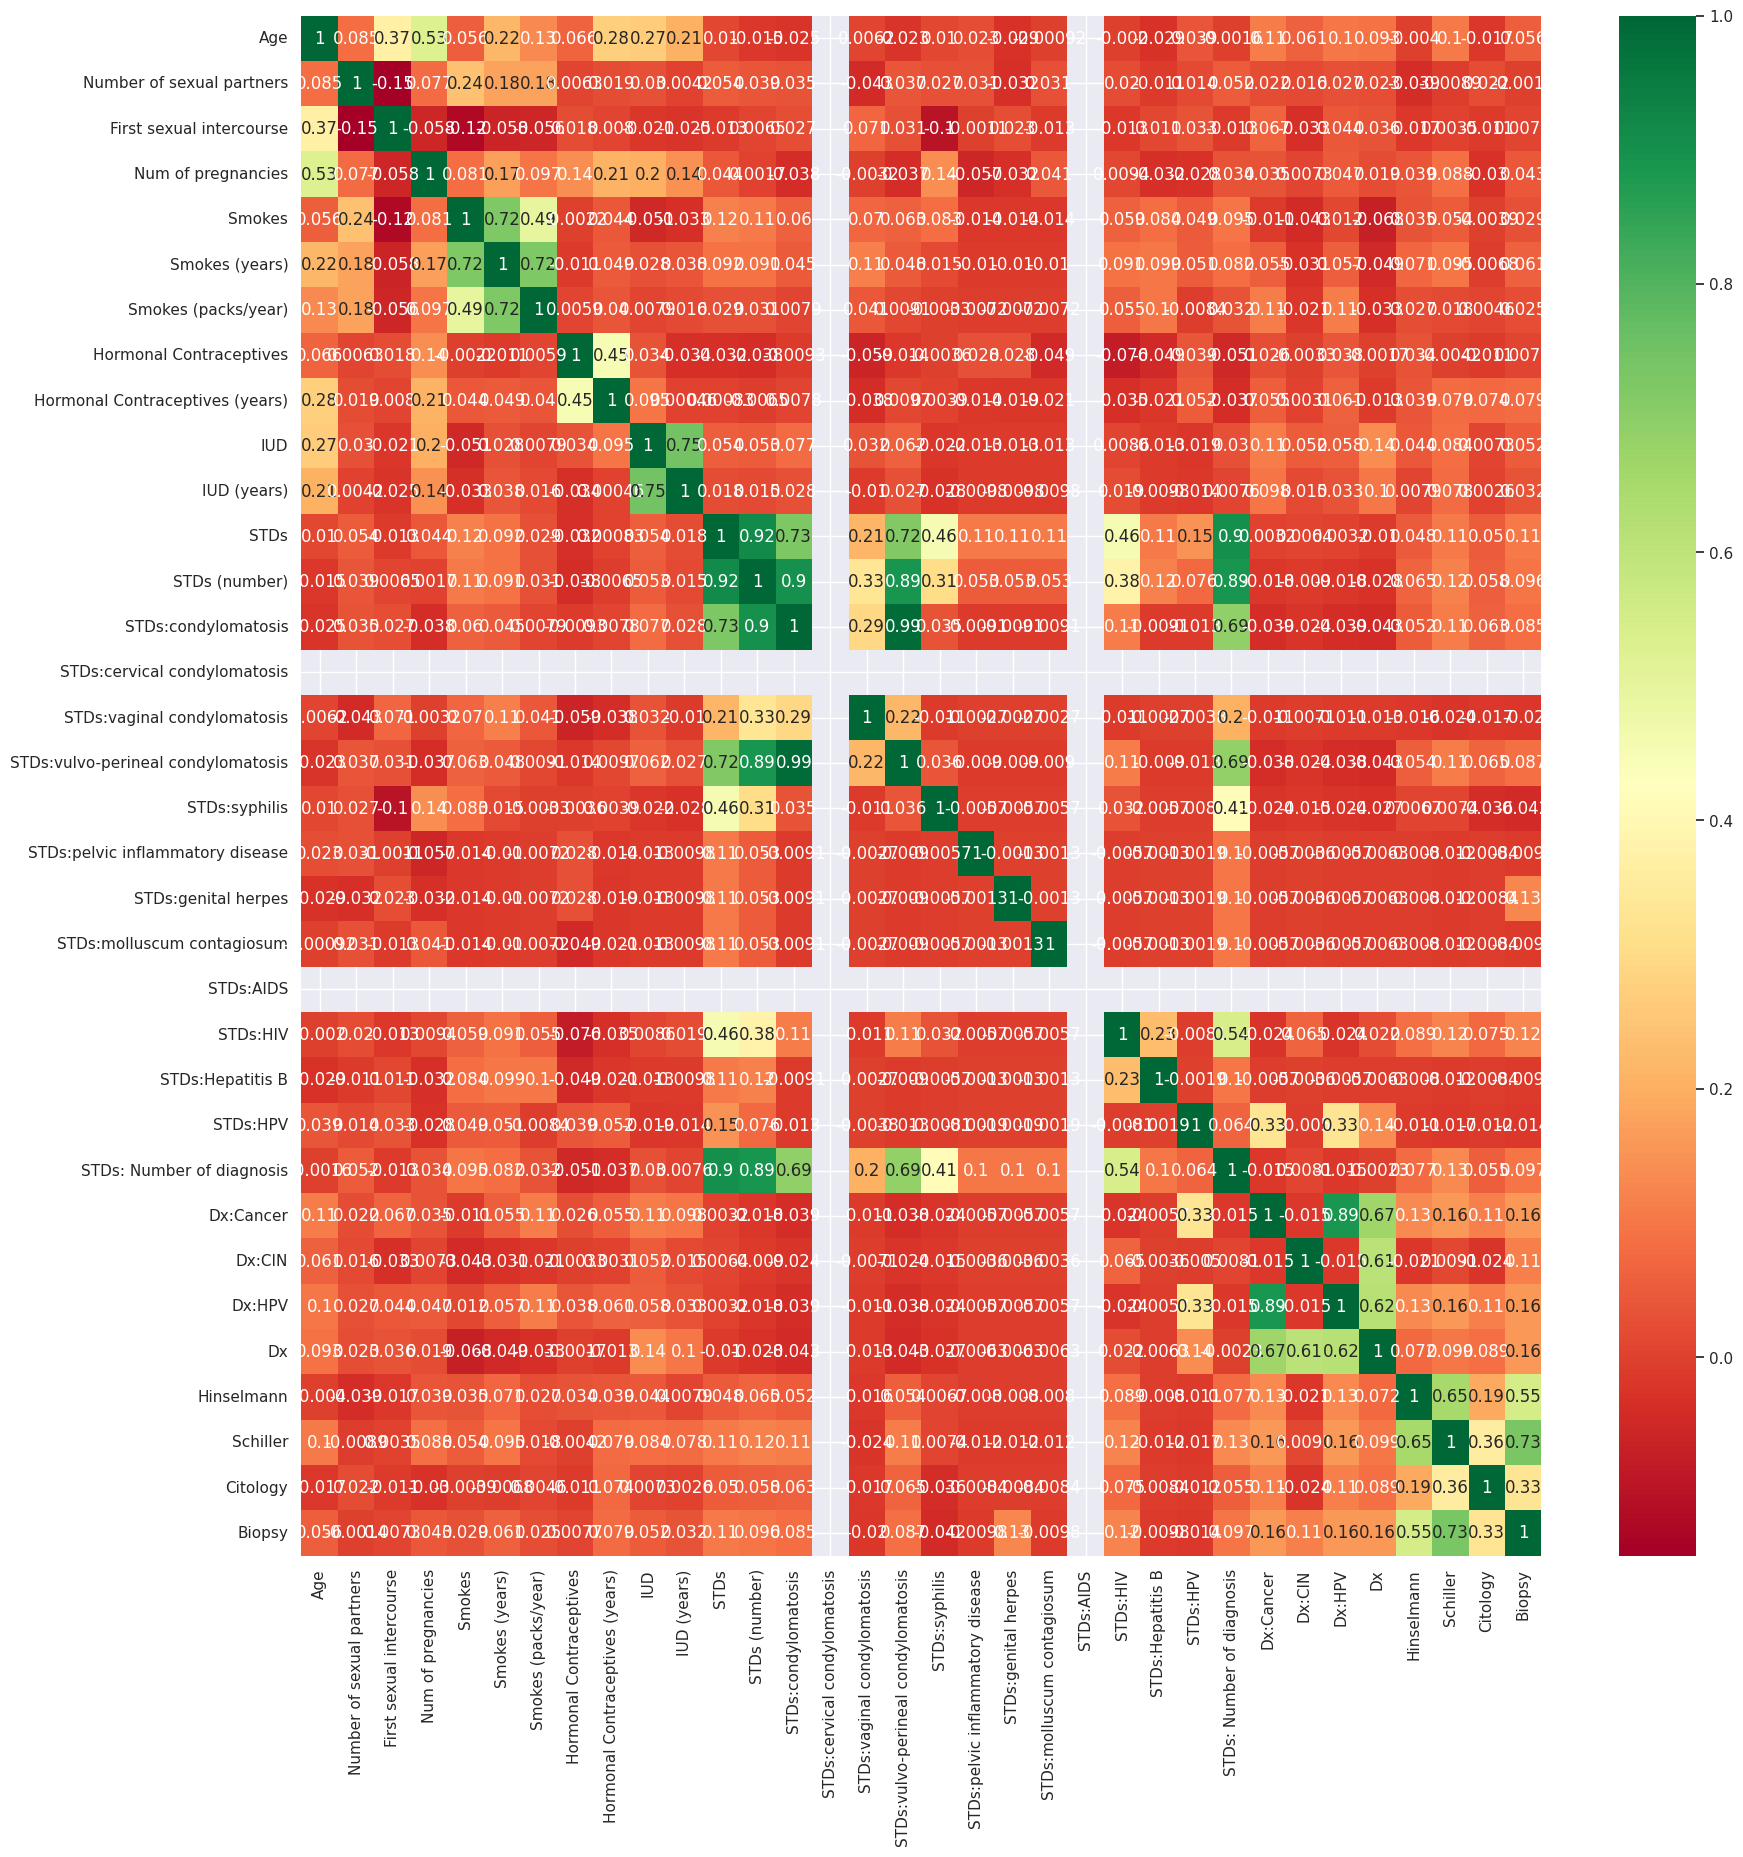

In [ ]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Identifying usefull Features through f regression technique

In [ ]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

k = 20 #number of features

#feature selection
#For Biopsy
X_new_skbest1 = SelectKBest(f_regression, k=k).fit_transform(X, y1)
#For Citology
X_new_skbest2 = SelectKBest(f_regression, k=k).fit_transform(X, y2)
#For Schiller
X_new_skbest3 = SelectKBest(f_regression, k=k).fit_transform(X, y3)
#For Hinselmann
X_new_skbest4 = SelectKBest(f_regression, k=k).fit_transform(X, y4)

#feature names of selected features
#For Biopsy
selected_features1 = X.columns[SelectKBest(f_regression, k=k).fit(X, y1).get_support()]
#For Citology
selected_features2 = X.columns[SelectKBest(f_regression, k=k).fit(X, y2).get_support()]
#For Schiller
selected_features3 = X.columns[SelectKBest(f_regression, k=k).fit(X, y3).get_support()]
#For Hinselmann
selected_features4 = X.columns[SelectKBest(f_regression, k=k).fit(X, y4).get_support()]

print(selected_features1) #For Biopsy
print(selected_features2) #For Citology
print(selected_features3) #For Schiller
print(selected_features4) #For Hinselmann

Index(['Age', 'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:genital herpes', 'STDs:HIV',
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV'],
      dtype='object')
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'STDs', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum',
       'STDs:HIV', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer',
       'Dx:CIN', 'Dx:HPV'],
      dtype='object')
Index(['Age', 'Num of pregnancies', 'Smokes', 'Smokes 

Using PCA to extract the principal components.


In [ ]:
from sklearn.decomposition import PCA

# selecting 10 principal components
pca = PCA(n_components=10)

pca.fit(X_new_skbest1)
pca.fit(X_new_skbest2)
pca.fit(X_new_skbest3)
pca.fit(X_new_skbest4)

# transforming dataset from 20 best selected features using skbest into the lower-dimensional space
X_new1= pca.transform(X_new_skbest1)    #For Biopsy
X_new2= pca.transform(X_new_skbest2)  #For Citology
X_new3= pca.transform(X_new_skbest3)  #For Schiller
X_new4= pca.transform(X_new_skbest4) #For Hinselmann
eigenvectors = pca.components_

print(eigenvectors)
print(X_new1) #For Biopsy
print(X_new2) #For Citology
print(X_new3) #For Schiller
print(X_new4) #For Hinselmann

[[ 9.98067029e-01 -1.15502551e-02  6.06585238e-03  5.33075844e-02
   1.24496783e-02  6.58457263e-03  1.77648101e-03  1.38723492e-03
   5.53523337e-03  1.13372278e-02  1.62921373e-02  5.93917660e-03
  -1.61522745e-03  6.14444554e-03  2.17224571e-03  4.49383232e-04
   1.14545080e-02  1.95485594e-03  9.42267898e-04  2.40703930e-03]
 [-2.75574329e-02  1.67912291e-03  5.92764892e-04  5.79814013e-02
   1.53420531e-02  2.83185109e-03 -3.97822678e-02 -3.22262461e-03
   2.47495807e-02  3.77955547e-01  7.36470038e-01  2.74626309e-01
   2.89288509e-02  2.69271801e-01  8.21800584e-02  4.88095648e-03
   3.90649215e-01 -4.36640407e-03 -1.06250393e-03 -4.46410481e-03]
 [ 3.51034627e-03 -6.00993158e-03 -4.63859017e-02 -2.43255635e-03
   5.27588145e-04 -1.23339738e-03 -9.88489220e-01 -1.24003489e-01
  -4.77799818e-02 -1.58183224e-02 -2.83591550e-02 -2.51533688e-02
   5.90629836e-03 -2.24282946e-02  1.96260342e-02 -4.92520491e-03
  -8.70691309e-04 -1.21736562e-02  7.39907117e-04 -1.54094244e-02]
 [-5.24

Splitting the training and testing Dataset

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new1, y1, test_size=0.20)      #For Biopsy
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new2, y2, test_size=0.20)    #For Citology
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new3, y3, test_size=0.20)    #For Schiller
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new4, y4, test_size=0.20)  #For Hinselmann

Balancing the Training data using Smote

In [ ]:
import pandas as pd

#For Biopsy
data1 = np.concatenate((X_train1, y_train1.values.reshape((-1, 1))), axis=-1)
# Converting concatenated array to a pandas dataframe
df1 = pd.DataFrame(data1, columns=['feature{}'.format(i) for i in range(X_train1.shape[1])] + ['label'])
df1['label'] = df1['label'].astype(int)

#For Citology
data2 = np.concatenate((X_train2, y_train2.values.reshape((-1, 1))), axis=-1)
# Converting concatenated array to a pandas dataframe
df2 = pd.DataFrame(data2, columns=['feature{}'.format(i) for i in range(X_train2.shape[1])] + ['label'])
df2['label'] = df2['label'].astype(int)

#For Schiller
data3 = np.concatenate((X_train3, y_train3.values.reshape((-1, 1))), axis=-1)
# Converting concatenated array to a pandas dataframe
df3 = pd.DataFrame(data3, columns=['feature{}'.format(i) for i in range(X_train3.shape[1])] + ['label'])
df3['label'] = df3['label'].astype(int)

#For Hinselmann
data4 = np.concatenate((X_train4, y_train4.values.reshape((-1, 1))), axis=-1)
# Converting concatenated array to a pandas dataframe
df4 = pd.DataFrame(data4, columns=['feature{}'.format(i) for i in range(X_train4.shape[1])] + ['label'])
df4['label'] = df4['label'].astype(int)

In [ ]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#For Biopsy
x_train_balanced1, y_train_balanced1 = smote.fit_resample(X_train1, y_train1)
#For Citology
x_train_balanced2, y_train_balanced2 = smote.fit_resample(X_train2, y_train2)
#For Schiller
x_train_balanced3, y_train_balanced3 = smote.fit_resample(X_train3, y_train3)
#For Hinselmann
x_train_balanced4, y_train_balanced4 = smote.fit_resample(X_train4, y_train4)


#Getting the accuracy of KNN Model

Accuracy for Biopsy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
classifier1.fit(x_train_balanced1, y_train_balanced1)
y_pred1 = classifier1.predict(X_test1)
print("training set score: %f" % classifier1.score(X_train1, y_train1))
print("test set score: %f" % classifier1.score(X_test1, y_test1))

training set score: 0.982507
test set score: 0.895349


Accuracy for Citology

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier2= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
classifier2.fit(x_train_balanced2, y_train_balanced2)
y_pred2 = classifier2.predict(X_test2)
print("training set score: %f" % classifier2.score(X_train2, y_train2))
print("test set score: %f" % classifier2.score(X_test2, y_test2))

training set score: 0.997085
test set score: 0.901163


Accuracy for Schiller

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier3= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
classifier3.fit(x_train_balanced3, y_train_balanced3)
y_pred3 = classifier3.predict(X_test3)
print("training set score: %f" % classifier3.score(X_train3, y_train3))
print("test set score: %f" % classifier3.score(X_test3, y_test3))

training set score: 0.967930
test set score: 0.883721


Accuracy for Hinselmann

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier4= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )
classifier4.fit(x_train_balanced4, y_train_balanced4)
y_pred4 = classifier4.predict(X_test4)
print("training set score: %f" % classifier4.score(X_train4, y_train4))
print("test set score: %f" % classifier4.score(X_test4, y_test4))

training set score: 0.994169
test set score: 0.930233


Confusion Matrix, Precision, Recall for Biopsy

In [ ]:
from sklearn.metrics import confusion_matrix

y_true1 = y_test1


# Creating confusion matrix
cm1 = confusion_matrix(y_true1, y_pred1)
tp1, fp1, fn1, tn1 = confusion_matrix(y_true1, y_pred1).ravel()

#precision and recall
precision1 = tp1 / (tp1 + fp1)
recall1 = tp1 / (tp1 + fn1)

pre_recall1 = pd.DataFrame({'Precision': [precision1], 'Recall': [recall1]}, index=[0])
print(pre_recall1)
print("Confusion Matrix")
print(cm1)

   Precision    Recall
0       0.95  0.938272
Confusion Matrix
[[152   8]
 [ 10   2]]


Confusion Matrix, Precision, Recall for Citology

In [ ]:
from sklearn.metrics import confusion_matrix

y_true2 = y_test2


# Creating confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)
tp2, fp2, fn2, tn2 = confusion_matrix(y_true2, y_pred2).ravel()

#precision and recall
precision2 = tp2 / (tp2 + fp2)
recall2 = tp2 / (tp2 + fn2)

pre_recall2 = pd.DataFrame({'Precision': [precision2], 'Recall': [recall2]}, index=[0])
print(pre_recall2)
print("Confusion Matrix")
print(cm2)

   Precision  Recall
0   0.944099    0.95
Confusion Matrix
[[152   9]
 [  8   3]]


Confusion Matrix, Precision, Recall for Schiller

In [ ]:
from sklearn.metrics import confusion_matrix

y_true3 = y_test3

# Creating confusion matrix
cm3 = confusion_matrix(y_true3, y_pred3)
tp3, fp3, fn3, tn3 = confusion_matrix(y_true3, y_pred3).ravel()

# precision and recall
precision3 = tp3 / (tp3 + fp3)
recall3 = tp3 / (tp3 + fn3)

pre_recall3 = pd.DataFrame({'Precision': [precision3], 'Recall': [recall3]}, index=[0])
print(pre_recall3)
print("Confusion Matrix")
print(cm3)

   Precision    Recall
0   0.937107  0.937107
Confusion Matrix
[[149  10]
 [ 10   3]]


Confusion Matrix, Precision, Recall for Hinselmann

In [ ]:
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are the actual and predicted labels, respectively
y_true4 = y_test4


# Creating confusion matrix
cm4 = confusion_matrix(y_true4, y_pred4)
tp4, fp4, fn4, tn4 = confusion_matrix(y_true4, y_pred4).ravel()

#precision and recall
precision4 = tp4 / (tp4 + fp4)
recall4 = tp4 / (tp4 + fn4)

pre_recall4 = pd.DataFrame({'Precision': [precision4], 'Recall': [recall4]}, index=[0])
print(pre_recall4)
print("Confusion Matrix")
print(cm4)

   Precision    Recall
0   0.946429  0.981481
Confusion Matrix
[[159   9]
 [  3   1]]
